<a href="https://colab.research.google.com/github/Hrit-Saha/CODESOFT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

▶ TASK-2: Movie Rating Prediction

| Author: Hrit Saha
| Batch: June
| Domain: Data Science

# Movie Rating Prediction


---


## Dataset Desciption:
`Source`: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies/data

###**Context**
Dataset of 15506 Indian movies taken from IMDb. This is all the Indian movies on IMDb as of 16/06/2021.

###**Content**
The dataset used for model building contained 15509 observations of 10 variables. The data contains the following information:

* `Name`: Name of Movie.

* `Year`: Year Movie was released.

* `Duration`: Time duration of Movie in minutes.

* `Genre`: Different Genre of Movies.

* `Rating`: Rating given to Movie.

* `Votes`: Votes given to Movie.

* `Director`: Director of the Movie.

* `Actor-1`: Main Actor of Movie.

* `Actor-2`: Second Main Actor of Movie.

* `Actor-3`: Third Main Actor of Movie.

## Import visual libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Import the dataset

In [63]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDb Movies India.csv", encoding="latin1")

## Getting basic Information

In [64]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [51]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [65]:
data.drop_duplicates(inplace=True)

In [66]:
data.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [67]:
# dropping all the null values
data.dropna(inplace=True)

In [68]:
data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


## Cleaning of the data

In [69]:
data["Year"]=data["Year"].str.strip("()").astype(int)
data["Duration"]=data["Duration"].str.replace(" min","").astype(int)
data["Votes"]=data["Votes"].str.replace(",","").astype(int)

# Exploratory Data Analysis(EDA)

The nature of the given data can be better understood when can visually analyse the distribution of features and corelations between the features.

## Visualization of the data

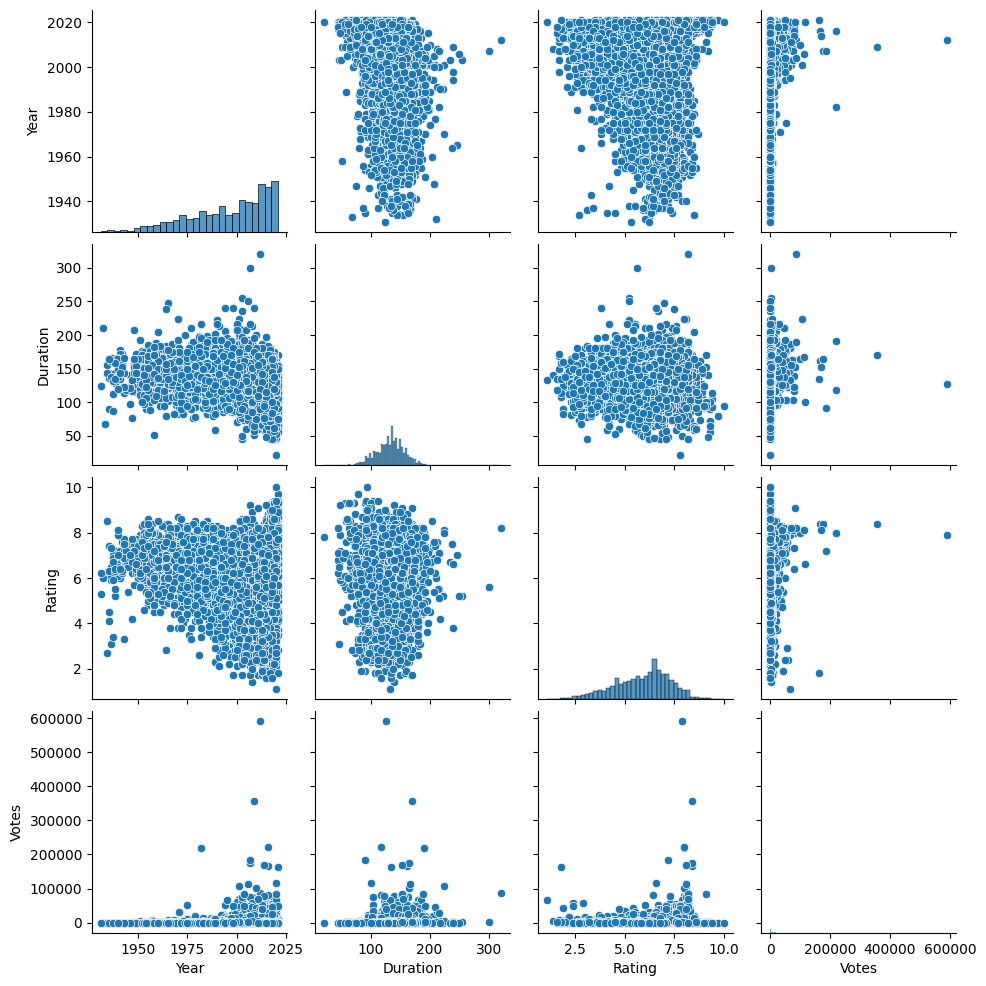

In [ ]:
sns.pairplot(data)

<ipython-input-35-ae1c8bef4554>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Year"],  hist_kws={'edgecolor': 'black'})


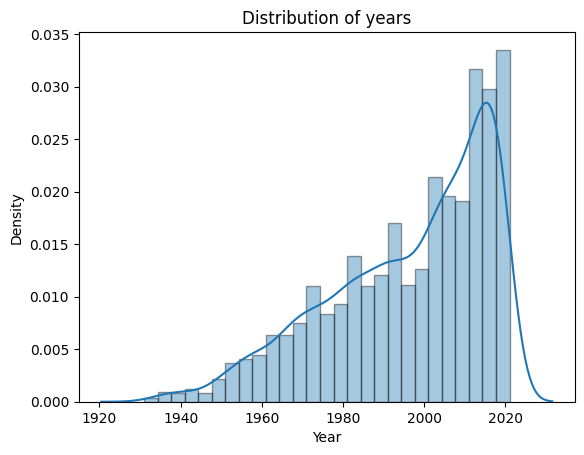

In [ ]:
sns.distplot(data["Year"],  hist_kws={'edgecolor': 'black'})
plt.title("Distribution of years")
plt.show()

<ipython-input-38-708ee77c67fb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Rating"], hist_kws={'edgecolor': 'black'})


Text(0.5, 1.0, 'Distribution of movie ratings')

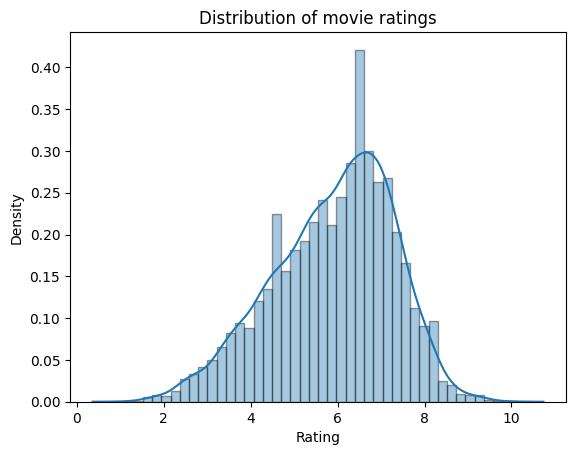

In [ ]:
sns.distplot(data["Rating"], hist_kws={'edgecolor': 'black'})
plt.title("Distribution of movie ratings")

<Axes: xlabel='Rating', ylabel='Duration'>

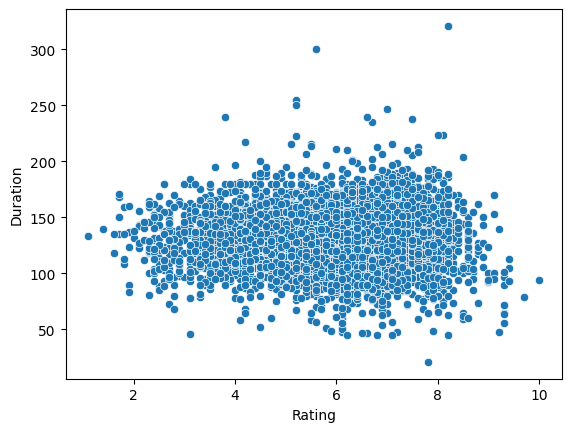

In [ ]:
sns.scatterplot(y="Duration",x="Rating",data=data)

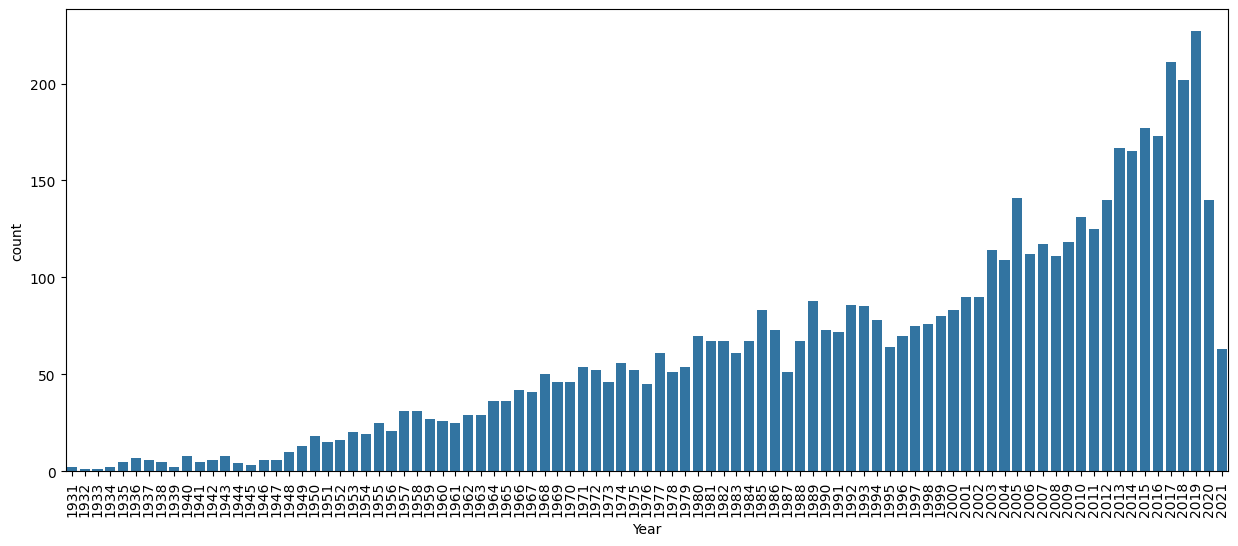

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=data["Year"])
plt.xticks(rotation=90)
plt.show()

In [19]:
top_10=data[["Name","Genre","Votes"]].sort_values(by="Votes",ascending=False).head(10)
print("TOP_10 based on votes")
top_10

TOP_10 based on votes


,Name,Genre,Votes
8219,Life of Pi,"Adventure, Drama, Fantasy",591417
75,3 Idiots,"Comedy, Drama",357889
8233,Lion,"Biography, Drama",220526
4848,Gandhi,"Biography, Drama, History",220118
14038,The Darjeeling Limited,"Adventure, Comedy, Drama",185127
8228,Like Stars on Earth,"Drama, Family",175810
10882,PK,"Comedy, Drama, Musical",168150
3410,Dangal,"Action, Biography, Drama",165074
11463,Radhe,"Action, Crime, Thriller",162455
3829,Dil Bechara,"Comedy, Drama, Romance",117377


Text(0.5, 1.0, 'Director with no of movies ')

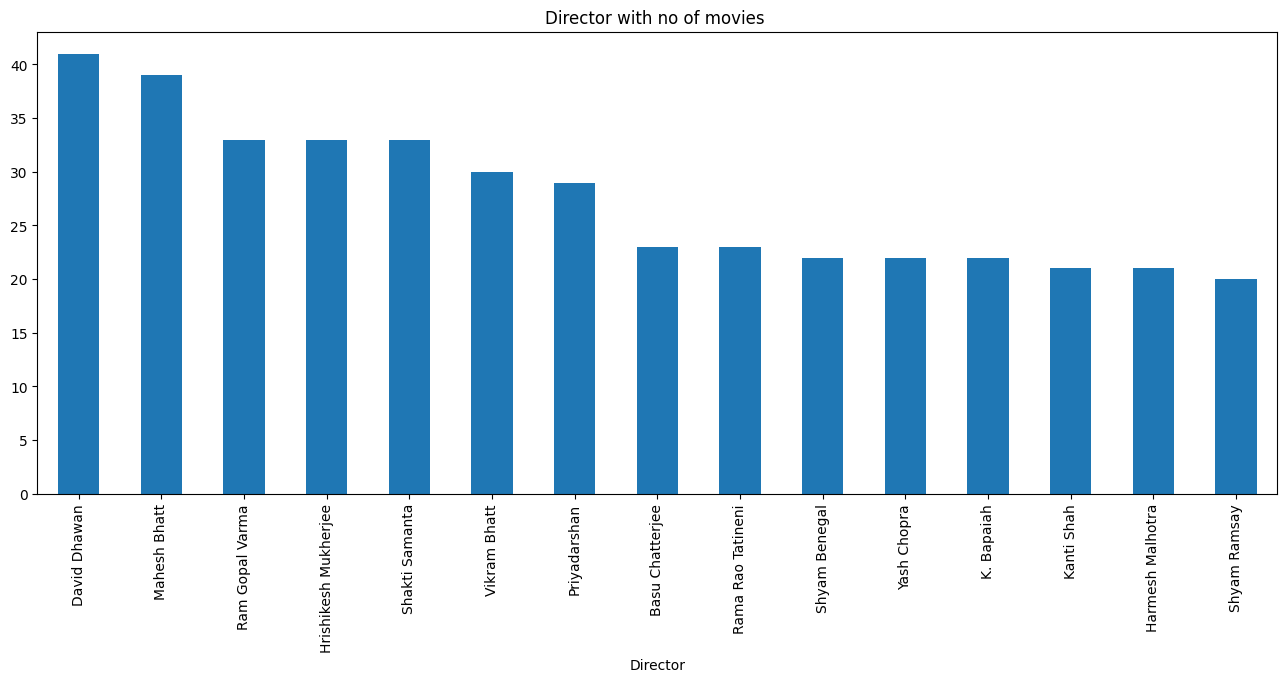

In [ ]:
plt.figure(figsize=(16,6))
director=data["Director"].value_counts(ascending=False)[:15].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Director with no of movies ")

Text(0.5, 1.0, 'Popular Actor ')

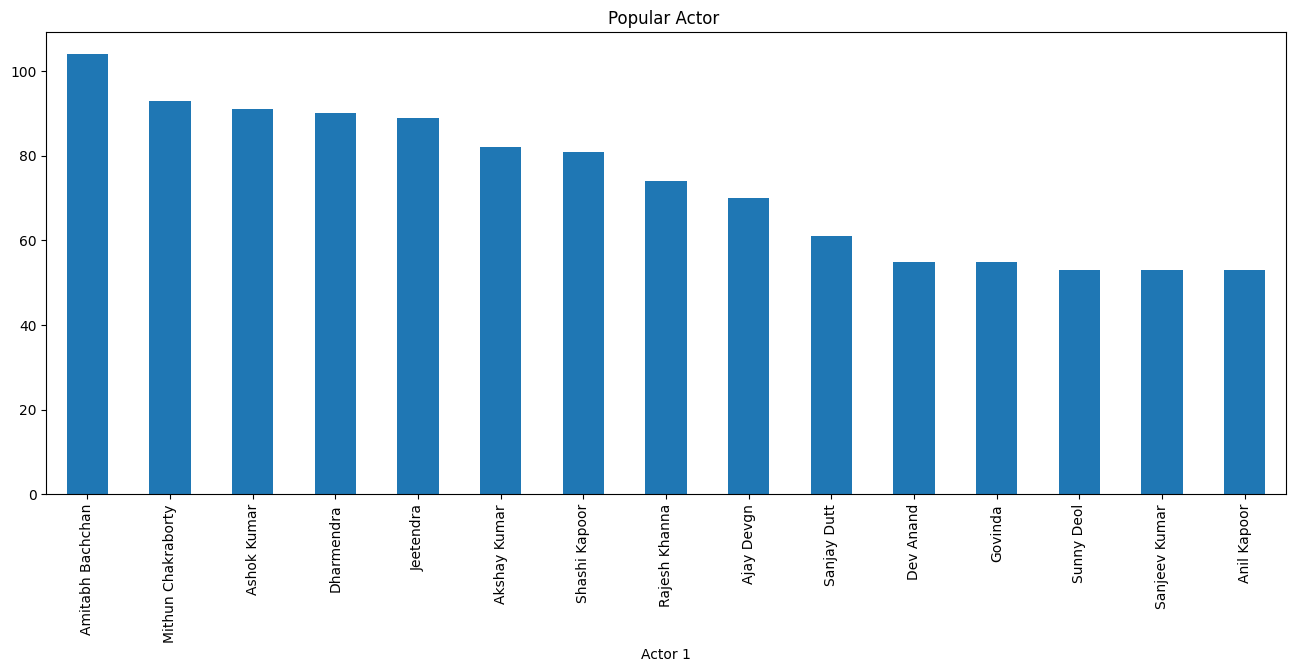

In [ ]:
plt.figure(figsize=(16,6))
Ac=data["Actor 1"].value_counts(ascending=False)[:15].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Popular Actor ")

In [70]:
data['Genre encoded'] = round(data.groupby('Genre')['Rating'].transform('mean'),1)
data['Votes encoded'] = round(data.groupby('Votes')['Rating'].transform('mean'),1)
data['Director encoded'] = round(data.groupby('Director')['Rating'].transform('mean'),1)
data['Actor 1 encoded'] = round(data.groupby('Actor 1')['Rating'].transform('mean'),1)
data['Actor 2 encoded'] = round(data.groupby('Actor 2')['Rating'].transform('mean'),1)
data['Actor 3 encoded'] = round(data.groupby('Actor 3')['Rating'].transform('mean'),1)

data.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
data['Rating'] = round(data['Rating'],1)

# Dropping the unnecessary columns

In [71]:
data.drop("Name",axis=1,inplace=True)

In [72]:
data.drop("Duration",axis=1,inplace=True)

<Axes: >

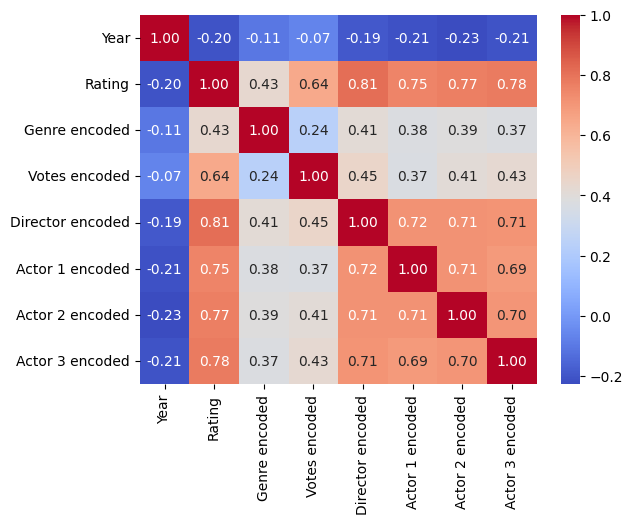

In [73]:
sns.heatmap(data.corr(),cmap="coolwarm",fmt=".2f",annot=True)

# ML Model Prediction

By analysis the complexity of data based on various aspects like number of features, their varying scales, distribution of numerical features and the labels of categorical features, we can come to the conclusion that certain ML models may fit well to this dataset and predict target variable with high accuracy.
1. `Linear Regression`


`rating` target feature and it is of categorical nature.

## ML Model fitting

### Train-test split

In [74]:
X=data.drop("Rating",axis=1)
y=data["Rating"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Linear Regression model on the Training set

In [76]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train,y_train)

### Prediction and Evaluation

In [77]:
prediction = model.predict(X_test)

### Making the confusion matrix

In [78]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(prediction,y_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,prediction)
print("MSE FOR LR")
print(mse)
print("R2_SCORE FOR LR")
print(r2_score)

MSE FOR LR
0.3159079214526678
R2_SCORE FOR LR
0.8284591812430777
